# Joseph Zoll | 9/15/22
## Practicing Linear Regression with simple data
### Dataset - (https://www.kaggle.com/datasets/aditeloo/student-study-hour-v2?datasetId=1236249&sortBy=voteCount)
Students with the features:
- Hours studied
- Scores

# ToDo
- import libraries
- import CSV
- clean data
- split data
- create linear regression
- plug training data into linear regression
    - fit
    - predict
- equation for regression
- plot points and regression
- make a simple app predicting grades on next exam

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
students = pd.read_csv('students.csv')

In [3]:
students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
students.describe()

,Hours,Scores
count,28.000000,28.000000
mean,4.832143,49.964286
std,2.530562,25.041421
min,1.100000,17.000000
25%,2.675000,29.250000
50%,4.650000,44.500000
75%,7.025000,70.500000
max,9.200000,95.000000


In [259]:
x, y = students[['Hours']].values, students.Scores

# Training the Model / Algorithm

In [260]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [261]:
model = LinearRegression()

In [262]:
choice = input('1 for regular data. And literally anything else for split data: ')
if choice == '1':
    model.fit(x,y)
else:
    model.fit(x_train, y_train)

1 for regular data. And literally anything else for split data: 2


In [263]:
model.score(x_test, y_test)

0.9254394457688527

In [264]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [9.72743538]
Intercept: 3.051607645839617


# Scatter Plot
- Red Line = Linear Regression equation (see coef and intercept above)
- Blue dots = All ORIGINAL data from CSV (nothing is split)
- BIG Yellow dots = testing data input (SAME data as linear regression, but just to demonstrate)

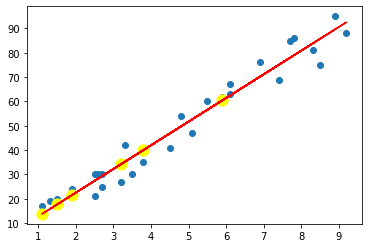

In [267]:
plt.scatter(x, y.values)
y_line = model.coef_*x+model.intercept_
plt.plot(x, y_line, color="red")
plt.scatter(x_test, model.predict(x_test), color='yellow', s=125)

# Comparing actual result with the predicted model result¶

In [238]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': model.predict(x_test)})
df

,Actual,Predicted
2,27,34.169393
22,35,39.975831
14,17,13.846861
17,24,21.588778
5,20,17.717820
11,62,60.298362


In [189]:
students.sort_values(by=['Hours']).head(10)

,Hours,Scores
14,1.1,17
25,1.3,19
5,1.5,20
17,1.9,24
0,2.5,21
16,2.5,30
26,2.6,30
20,2.7,30
9,2.7,25
2,3.2,27


# Simple App: Ask a user how much they studied and compute their predicted score on the exam

In [257]:
def guessScore():
    hours = float(input("How many hours did you study for this exam? [ENTER A NUMBER]: "))
    hours_obj = np.array([[hours]])
    hours_obj = hours_obj.reshape(1,-1)
    guess = model.predict(hours_obj)[0]
    print(f'You grade on the next exam will be a:\n \t\t\t\t\t\t{round(guess, 2)}')
guessScore()

How many hours did you study for this exam? [ENTER A NUMBER]: 6
You grade on the next exam will be a:
 						61.27


### You did it! Simple Linear Regression complete ✅

# Action Step(s) / Focus
- Publish to Github
- Learn PCA, take break from LR

# Notes / Source(s)

- This shows training set as the ENTIRE set and performing a single prediction:
https://stackoverflow.com/questions/50090767/single-prediction-with-linear-regression
- Helpful Link with same data: https://www.kaggle.com/code/aditeloo/your-journey-begins-here